# Regresión Lineal
El análisis de regresión consiste en
ajustar un modelo a los datos, estimando coeficientes a partir de las observaciones, con el fin de predecir
valores de la variable de respuesa a partir de una (regresión simple) o más variables (regresión múltiple)
predictivas o explicativas.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [3]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [4]:
!pip install scikit-learn

In [61]:
#Variable independiente que ayuda a predecir
x = data[['CO','NOX','SO2']]
y=data['PM25'] # Variable dependiente que se quiere predecir

In [62]:
#Divimos los datos y pedimos la longitud de los mismos, multiplicado por aprox el 80% de los datos (puede ser int o no)
split_index = int(len(data)*0.8)

In [63]:
# Llamamos a los primeros 80% datos para el entrenamiento
#iloc: separa datos
X_train=x.iloc[:split_index] #Escoge los datos de x desde el inicio hasta split_index
#Prueba para validar datos del 20% de los datos
X_test = x.iloc[split_index:] # Desde split hasta el final

#Ahora con y
y_train=y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [64]:
#Importamos paqueteria
from sklearn.linear_model import LinearRegression

In [65]:
# Entrenar el modelo
model = LinearRegression()
# Ingresamos los primeros 80% de los datos
model.fit(X_train, y_train)

#Mostramos los parametros beta y = b0+b1x1+...+bnxn

LinearRegression()

In [66]:
y_pred=model.predict(X_test) #Evaluamos el modelo de la preddicion en el ultimo 20% de la variable dependiente

In [67]:
Coef = pd.DataFrame({
    'Variable':x.columns,
    'Coeficientes':model.coef_
})

In [68]:
print(Coef) #Da los coeficientes beta1 (variable independiente) y muestra uno porque solo hay un contaminante

  Variable  Coeficientes
0       CO     13.394922
1      NOX      0.067212
2      SO2      0.840904


In [69]:
print(f'Intercepto: {model.intercept_}') #Proporciona el beta0

Intercepto: 9.14465160979532


In [70]:
#Metricas para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred) #Aplica la funcion r2

In [71]:
r2

0.36448052999862923

In [72]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
rmse # Error cuadratico medio

5.534238754299773

In [74]:
#Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

In [75]:
mae

4.161644323460395

In [76]:
#Mostrar los valores
y_pred #ultimo 20% de datos

array([17.10667968, 17.12955616, 17.17553993, 16.63213477, 18.25187149,
       19.24768035, 19.10887924, 19.48823007, 19.7083007 , 14.64130241,
       14.23271757, 14.58968509, 15.90451998, 18.10418408, 20.71147738,
       19.44992726, 16.51315924, 20.32857608, 18.97324875, 19.4078672 ,
       19.51110111, 17.51902892, 13.86514612, 13.49093982, 17.96584798,
       19.42645771, 19.89519469, 16.61749381, 15.63711324, 18.71925111,
       16.27801078, 21.36125545, 19.67138303, 17.79848587, 21.1549186 ,
       22.82019683, 24.16783028, 19.18532363, 20.72903116, 20.4133247 ,
       26.48661102, 27.28403828, 19.83293148, 20.67686522, 19.09194041,
       21.01164044, 23.78683148, 23.3614228 , 19.64983548, 18.21303746,
       17.30225013, 15.18420528, 17.7640753 , 22.36704125, 21.26872371,
       19.67407669, 15.27746767, 16.37531736, 18.1185959 , 19.52766894,
       16.29070543, 22.03086088, 22.68163123, 17.82645476, 23.78883723,
       20.15377391, 20.00692202, 23.04124133, 20.04144617, 20.41

In [77]:
import matplotlib.pyplot as plt # Para las graficas


In [78]:
#Escribimos residuos (valores de la prediccion - valores reales)
res = y_test - y_pred

Text(0, 0.5, 'Frecuencia')

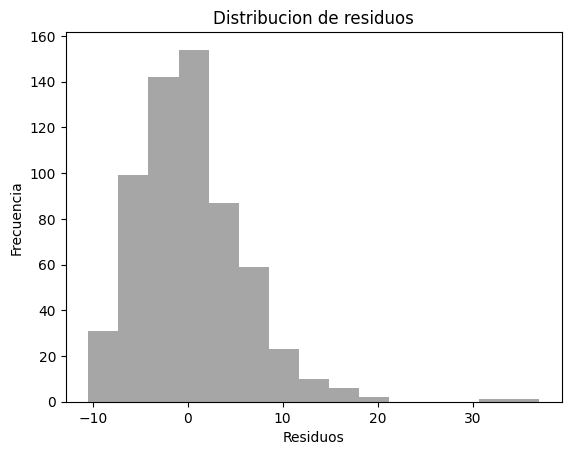

In [79]:
#Hacemos un histograma
plt.hist(res, bins=15, color='gray', alpha=0.7)
plt.title("Distribucion de residuos")
#Nombre a los ejes
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

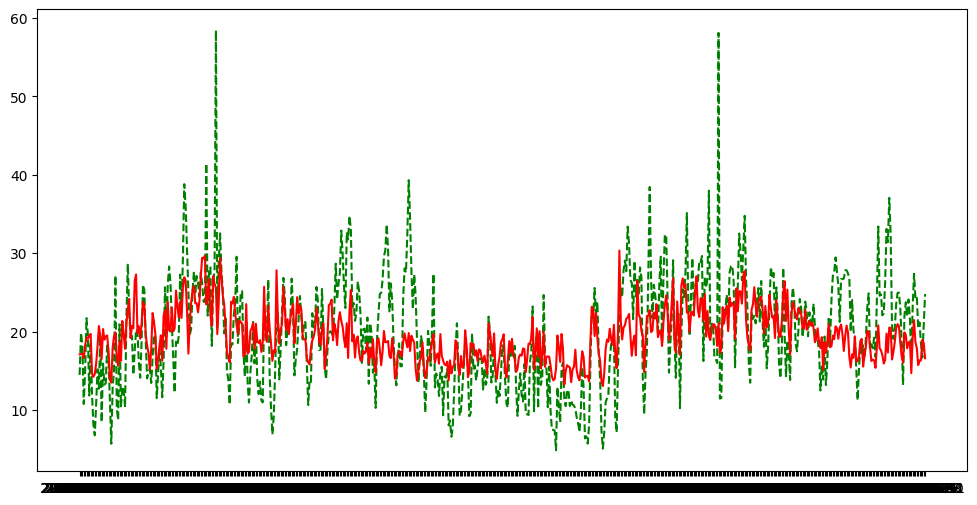

In [80]:
# Graficamos en una serie temporal la prediccion
plt.figure(figsize=(12,6)) #tamano de la figura
#Grafcios reales y la prediccion
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='green') #Va del 80% en adelante (eje x) y en y "y_test"

#Escribimos la prediccion
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

#Naranje es la predccion y lo azul son los ultimos 20%

# Algoritmo Random Forest
Basado en arboles de decision, es decir, escoge de forma aleatoria muchos datos e irlos dividiendo para obtener una predccion.

Con hiperparametros (son controlables):
1. max_depth:profundidad del arbol.

2. n_estimators: Numero de arboles en el bosque.

3. random_state: Semilla para generar numeros aleatorios, utilizada para garantizar la reproducibilida de los resultado.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [94]:
#Divimos los datos
data = data.sort_values(by='fecha') #En caso de que los datos no esten ordenados por fecha
split_index = int(len(data)*0.8) #indice del 80%

#Divide en 80% y 20%
X_train = x.iloc[:split_index]
X_test = x.iloc[split_index:]
y_train = x.iloc[:split_index]
y_test = x.iloc[split_index:]

In [95]:
#Craer el modelo con los hiperparametros
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42) #Damos una instruccion para que el numero de elementos en el arbol sea el mismo para todos
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [97]:
#Realizamos la predicciones
y_pred = rf_model.predict(X_test)

In [98]:
y_pred #Valores de la prediccion

array([[ 0.34923796, 29.10343165,  2.37464505],
       [ 0.39244757, 28.22688054,  2.0495877 ],
       [ 0.25730859, 18.41750052,  4.04941219],
       ...,
       [ 0.43492392, 36.44739508,  1.27025041],
       [ 0.45145391, 37.10725168,  1.27388849],
       [ 0.3404974 , 25.66265825,  1.27488924]])

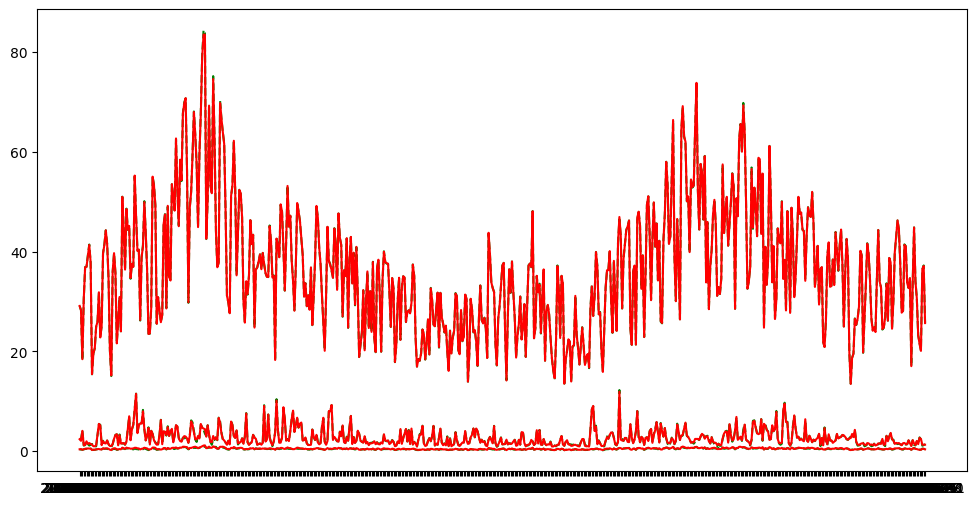

In [99]:
# Encontramos las metricas
# Graficamos en una serie temporal la prediccion
plt.figure(figsize=(12,6)) #tamano de la figura
#Grafcios reales y la prediccion
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='green') #Va del 80% en adelante (eje x) y en y "y_test"

#Escribimos la prediccion
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

#Naranje es la predccion y lo azul son los ultimos 20%